# Preprocessing for Machine Learning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download the data

In [2]:
# Dictionary with dataset names as keys and URLs as values
dataset_urls = {
    'hiking': 'https://assets.datacamp.com/production/repositories/1816/datasets/4f26c48451bdbf73db8a58e226cd3d6b45cf7bb5/hiking.json',
    'wine': 'https://assets.datacamp.com/production/repositories/1816/datasets/9bd5350dfdb481e0f94eeef6acf2663452a8ef8b/wine_types.csv',
    'ufo':'https://assets.datacamp.com/production/repositories/1816/datasets/a5ebfe5d2ed194f2668867603b563963af4769e9/ufo_sightings_large.csv',
    'volunteer':'https://assets.datacamp.com/production/repositories/1816/datasets/668b96955d8b252aa8439c7602d516634e3f015e/volunteer_opportunities.csv'
}

def fetch_data_and_create_dataframe(dataset_urls):
    dataframes = {}  # Dictionary to store DataFrames

    for dataset, url in dataset_urls.items():
        try:
            # Determine file format based on the dataset name
            file_format = 'json' if dataset == 'hiking' else 'csv'
            
            # Read the data from the URL into a DataFrame
            if file_format == 'json':
                df = pd.read_json(url)
            else:
                df = pd.read_csv(url)

            dataframes[dataset] = df
            print(f"Successfully fetched {dataset} data.")
        except Exception as e:
            print(f"Error fetching {dataset} data: {str(e)}")

    return dataframes

# Call the function with your dataset URLs
fetched_dataframes = fetch_data_and_create_dataframe(dataset_urls)

# Now 'resulting_dataframes' is a dictionary where keys are dataset names and values are DataFrames
# You can access each DataFrame using, for example, fetched_dataframes['hiking']

Successfully fetched hiking data.
Successfully fetched wine data.
Successfully fetched ufo data.
Successfully fetched volunteer data.


In [3]:
# Display the hiking dataset
hiking = fetched_dataframes['hiking']
display(hiking.head())

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


## Exploring with pandas

In [4]:
# Number of records with missing values
print(hiking.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length          29 non-null     object 
 5   Difficulty      27 non-null     object 
 6   Other_Details   31 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
 9   lat             0 non-null      float64
 10  lon             0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 3.1+ KB
None


In [5]:
# Summary statistics
print(fetched_dataframes['wine'].describe())

             Type     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

## Removing missing data

In [6]:
data = {
    'A': [1.0, 4.0, 7.0, np.nan, 5.0],
    'B': [np.nan, 7.0, np.nan, 7.0, 9.0],
    'C': [2.0, 3.0, np.nan, np.nan, 7.0],
}

df = pd.DataFrame(data)
display(df)


,A,B,C
0,1.0,NaN,2.0
1,4.0,7.0,3.0
2,7.0,NaN,NaN
3,NaN,7.0,NaN
4,5.0,9.0,7.0


In [7]:
# drop all rows containing missing values
display(df.dropna())

,A,B,C
1,4.0,7.0,3.0
4,5.0,9.0,7.0


In [8]:
# drop specific rows using index labels (defaults to dropping rows)
display(df.drop([1, 2, 3]))

,A,B,C
0,1.0,NaN,2.0
4,5.0,9.0,7.0


In [9]:
# drop a specific column especially if most or all of its columns are missing
display(df.drop("A", axis=1))

,B,C
0,NaN,2.0
1,7.0,3.0
2,NaN,NaN
3,7.0,NaN
4,9.0,7.0


In [10]:
# drop rows where data is missing in a particular column

# first - how many values we have in each column
display(df.isna().sum())

A    1
B    2
C    2
dtype: int64

In [11]:
# second - specify a list of labels to dropna
# here, drop those rows where there's missing values in column B
display(df.dropna(subset=["B"]))

,A,B,C
1,4.0,7.0,3.0
3,NaN,7.0,NaN
4,5.0,9.0,7.0


In [12]:
# specify how many missing values we require in each row
display(df.dropna(thresh=2))

,A,B,C
0,1.0,NaN,2.0
1,4.0,7.0,3.0
4,5.0,9.0,7.0


## Merging datasets

In [13]:
import pandas as pd

# Gas prices dataset
gas_prices_data = {'date': ['2023-01-01', '2023-01-05', '2023-02-15', '2023-03-17', '2023-04-23', '2023-04-24'],
                   'price': [2.00, 3.00, 2.00, 1.00, 3.00, 2.50]}
gas_prices_df = pd.DataFrame(gas_prices_data)

# Shipment history dataset
shipment_history_data = {'date': ['2023-01-01', '2023-01-02', '2023-02-15', '2023-03-01', '2023-04-23', '2023-05-11'],
                          'quantity': [1000, 5000, 500, 200, 1500, 2500]}
shipment_history_df = pd.DataFrame(shipment_history_data)

# Car sales dataset
car_sales_data = {'date': ['2023-03-02', '2023-03-27', '2023-04-28', '2023-05-15', '2023-07-06', '2023-07-23', '2023-08-09', '2023-08-17'],
                  'sales': [5020, 10020, 30102, 200, 1500, 2500, 500, 2150]}
car_sales_df = pd.DataFrame(car_sales_data)

# Merging all three datasets on 'date' with a full outer join
merged_data = pd.merge(gas_prices_df, shipment_history_df, on='date', how='outer')
merged_data = pd.merge(merged_data, car_sales_df, on='date', how='outer')

# If you want to see the result
print(merged_data)



          date  price  quantity    sales
0   2023-01-01    2.0    1000.0      NaN
1   2023-01-02    NaN    5000.0      NaN
2   2023-01-05    3.0       NaN      NaN
3   2023-02-15    2.0     500.0      NaN
4   2023-03-01    NaN     200.0      NaN
5   2023-03-02    NaN       NaN   5020.0
6   2023-03-17    1.0       NaN      NaN
7   2023-03-27    NaN       NaN  10020.0
8   2023-04-23    3.0    1500.0      NaN
9   2023-04-24    2.5       NaN      NaN
10  2023-04-28    NaN       NaN  30102.0
11  2023-05-11    NaN    2500.0      NaN
12  2023-05-15    NaN       NaN    200.0
13  2023-07-06    NaN       NaN   1500.0
14  2023-07-23    NaN       NaN   2500.0
15  2023-08-09    NaN       NaN    500.0
16  2023-08-17    NaN       NaN   2150.0


In [14]:
import pandas as pd

# Gas prices dataset
gas_prices_data = {'date': ['2023-01-01', '2023-01-05', '2023-02-15', '2023-03-17', '2023-04-23', '2023-04-24'],
                   'price': [2.00, 3.00, 2.00, 1.00, 3.00, 2.50]}
gas_prices_df = pd.DataFrame(gas_prices_data)

# Shipment history dataset
shipment_history_data = {'date': ['2023-01-01', '2023-01-02', '2023-02-15', '2023-03-01', '2023-04-23', '2023-05-11'],
                          'quantity': [1000, 5000, 500, 200, 1500, 2500]}
shipment_history_df = pd.DataFrame(shipment_history_data)

# Car sales dataset
car_sales_data = {'date': ['2023-03-02', '2023-03-27', '2023-04-28', '2023-05-15', '2023-07-06', '2023-07-23', '2023-08-09', '2023-08-17'],
                  'sales': [5020, 10020, 30102, 200, 1500, 2500, 500, 2150]}
car_sales_df = pd.DataFrame(car_sales_data)

# Merging all three datasets on 'date' with a full outer join
merged_data = pd.merge(gas_prices_df, shipment_history_df, on='date', how='outer')
merged_data = pd.merge(merged_data, car_sales_df, on='date', how='outer')

# Sorting the DataFrame by 'date' to ensure correct filling order
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.sort_values(by='date', inplace=True)

# Filling missing values based on the specified method
merged_data.ffill(inplace=True)
merged_data.bfill(inplace=True)

# If you want to see the result
print(merged_data)


         date  price  quantity    sales
0  2023-01-01    2.0    1000.0   5020.0
1  2023-01-02    2.0    5000.0   5020.0
2  2023-01-05    3.0    5000.0   5020.0
3  2023-02-15    2.0     500.0   5020.0
4  2023-03-01    2.0     200.0   5020.0
5  2023-03-02    2.0     200.0   5020.0
6  2023-03-17    1.0     200.0   5020.0
7  2023-03-27    1.0     200.0  10020.0
8  2023-04-23    3.0    1500.0  10020.0
9  2023-04-24    2.5    1500.0  10020.0
10 2023-04-28    2.5    1500.0  30102.0
11 2023-05-11    2.5    2500.0  30102.0
12 2023-05-15    2.5    2500.0    200.0
13 2023-07-06    2.5    2500.0   1500.0
14 2023-07-23    2.5    2500.0   2500.0
15 2023-08-09    2.5    2500.0    500.0
16 2023-08-17    2.5    2500.0   2150.0


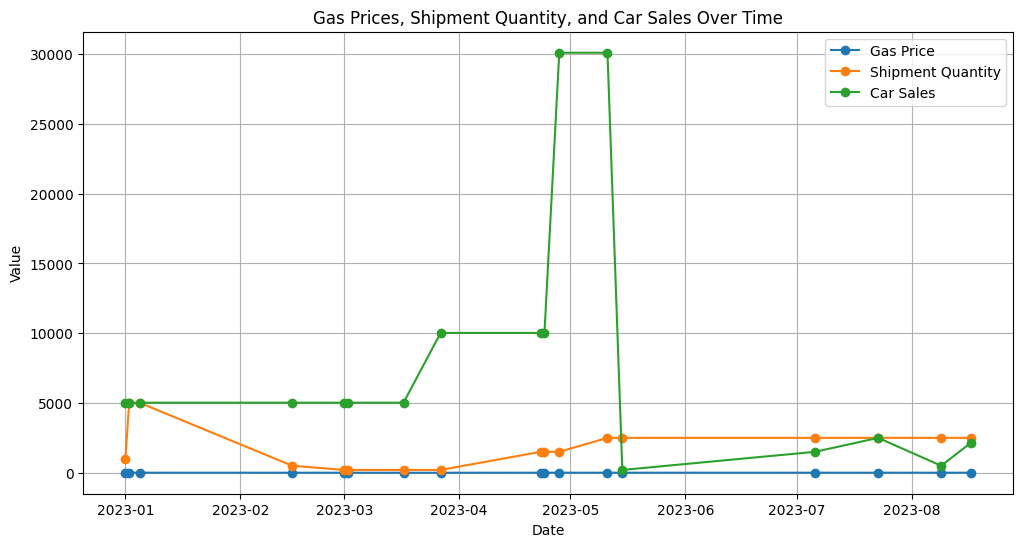

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already merged and filled the data as mentioned in the previous code

# Plotting the line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_data['date'], merged_data['price'], label='Gas Price', marker='o')
plt.plot(merged_data['date'], merged_data['quantity'], label='Shipment Quantity', marker='o')
plt.plot(merged_data['date'], merged_data['sales'], label='Car Sales', marker='o')

plt.title('Gas Prices, Shipment Quantity, and Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


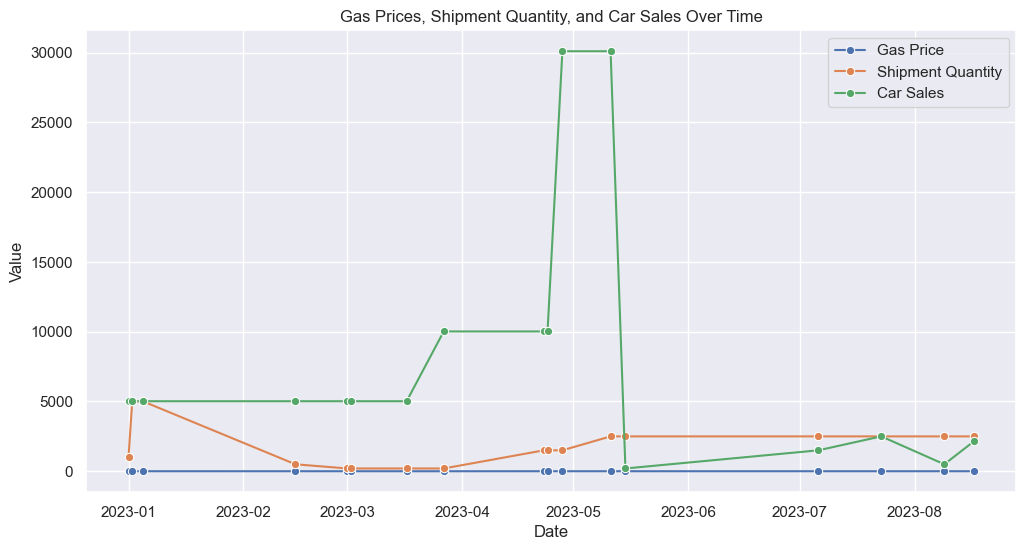

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already merged and filled the data as mentioned in the previous code

# Set Seaborn style
sns.set(style="darkgrid")

# Plotting the line graph with Seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(x='date', y='price', data=merged_data, label='Gas Price', marker='o')
sns.lineplot(x='date', y='quantity', data=merged_data, label='Shipment Quantity', marker='o')
sns.lineplot(x='date', y='sales', data=merged_data, label='Car Sales', marker='o')

plt.title('Gas Prices, Shipment Quantity, and Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


/var/folders/_5/yy8rgb3j4nlcm0p56vlgkmfc0000gn/T/ipykernel_4908/1954373050.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='price', data=merged_data, label='Gas Price', marker='o', ci=None, estimator='lowess')
/var/folders/_5/yy8rgb3j4nlcm0p56vlgkmfc0000gn/T/ipykernel_4908/1954373050.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='quantity', data=merged_data, label='Shipment Quantity', marker='o', ci=None, estimator='lowess')
/var/folders/_5/yy8rgb3j4nlcm0p56vlgkmfc0000gn/T/ipykernel_4908/1954373050.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='sales', data=merged_data, label='Car Sales', marker='o', ci=None, estimator='lowess')


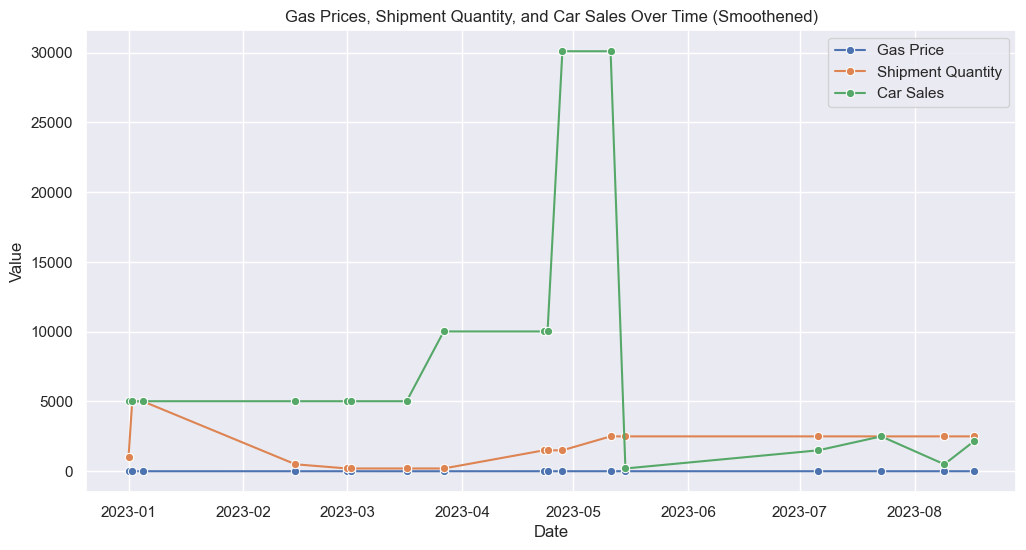

In [19]:
# Assuming you have already merged and filled the data as mentioned in the previous code

# Set Seaborn style
sns.set(style="darkgrid")

# Plotting the smoothened line graph with Seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(x='date', y='price', data=merged_data, label='Gas Price', marker='o', err_style=None, estimator='lowess')
sns.lineplot(x='date', y='quantity', data=merged_data, label='Shipment Quantity', marker='o', err_style=None, estimator='lowess')
sns.lineplot(x='date', y='sales', data=merged_data, label='Car Sales', marker='o', err_style=None, estimator='lowess')

plt.title('Gas Prices, Shipment Quantity, and Car Sales Over Time (Smoothened)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
